# Exploratory Data Analysis - HIV Clinical Dataset
## Objective: Understand data structure, missing patterns, and feature distributions for Viral Load Suppression prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Plotting style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

Matplotlib is building the font cache; this may take a moment.


## 1. Load Data

In [2]:
# Load dataset
df = pd.read_csv('clinical_genotype_HGB.csv')
print(f"Dataset shape: {df.shape}")
print(f"Number of unique patients: {df['wihsid'].nunique()}")
print(f"Average visits per patient: {df.shape[0] / df['wihsid'].nunique():.2f}")

Dataset shape: (45920, 48)
Number of unique patients: 2852
Average visits per patient: 16.10


## 2. Target Variable: Viral Load Suppression Status

Creating binary target: `undetectable` (1 = suppressed, 0 = not suppressed)

Target Variable Distribution:
undetectable
0.0    21947
1.0    11064
Name: count, dtype: int64

Class Balance: undetectable
0.0    0.664839
1.0    0.335161
Name: proportion, dtype: float64


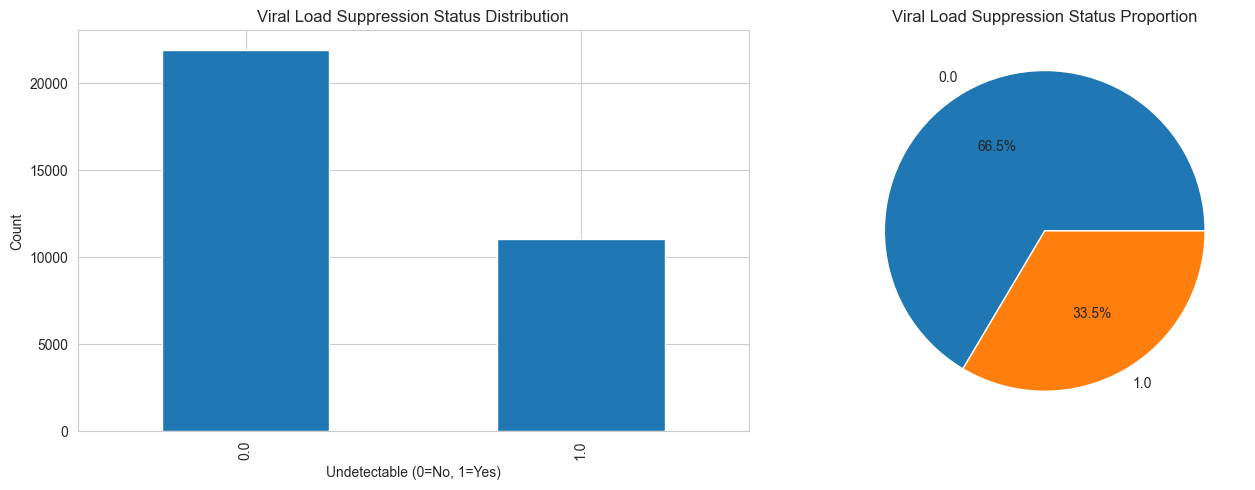

In [3]:
# Examine target variable
print("Target Variable Distribution:")
print(df['undetectable'].value_counts())
print(f"\nClass Balance: {df['undetectable'].value_counts(normalize=True)}")

# Visualize target distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

df['undetectable'].value_counts().plot(kind='bar', ax=axes[0])
axes[0].set_title('Viral Load Suppression Status Distribution')
axes[0].set_xlabel('Undetectable (0=No, 1=Yes)')
axes[0].set_ylabel('Count')

df['undetectable'].value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%', ax=axes[1])
axes[1].set_title('Viral Load Suppression Status Proportion')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

## 3. Data Overview

In [4]:
# Display first few rows
df.head(10)

,wihsid,bsdate,bsvisit,dob,status,lnegdate,fposdate,frstartd,frstaidd,frstdthd,visit,race,anydrug,vload,CD4N,CD8N,date,ageatvis,nrti,nnrti,pi,hemoglob,n,call,genotype,HIV,logvl,sqrtcd4,sqrtcd8,duration,durationy,cd8a,vla,genotype3,CD4_8,APOBEC,APOB,APOBgr,undetectable,r,Hgb,Hgbgen,HgbgenSS,apofer,ferss,aposs,APOBgr2,N
0,10100014.0,12737.0,1.0,-1418.0,2.0,6575.0,12737.0,12737.0,12737.0,13404.0,4.0,3.0,NaN,310000.0,0.0,52.0,13284.0,40.25,2.0,0.0,0.0,NaN,4.0,NaN,NaN,1.0,12.644327,0.000000,7.211102,17.934425,1.494535,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
1,10100014.0,12737.0,1.0,-1418.0,2.0,6575.0,12737.0,12737.0,12737.0,13404.0,3.0,3.0,NaN,72000.0,4.0,220.0,13100.0,39.75,2.0,0.0,0.0,NaN,3.0,NaN,NaN,1.0,11.184422,2.000000,14.832396,11.901639,0.991803,NaN,NaN,NaN,0.018182,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
2,10100014.0,12737.0,1.0,-1418.0,2.0,6575.0,12737.0,12737.0,12737.0,13404.0,1.0,3.0,1.0,100000.0,15.0,503.0,12737.0,38.75,1.0,0.0,0.0,NaN,1.0,NaN,NaN,1.0,11.512925,3.872984,22.427662,0.000000,0.000000,NaN,NaN,NaN,0.029821,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
3,10100014.0,12737.0,1.0,-1418.0,2.0,6575.0,12737.0,12737.0,12737.0,13404.0,2.0,3.0,1.0,79000.0,5.0,161.0,12946.0,39.33,1.0,0.0,0.0,NaN,2.0,NaN,NaN,1.0,11.277204,2.236068,12.688578,6.852459,0.571038,NaN,NaN,NaN,0.031056,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
4,10100040.0,12764.0,1.0,615.0,2.0,6575.0,12771.0,14353.0,12764.0,51135.0,8.0,3.0,NaN,8600.0,335.0,1171.0,14018.0,36.70,0.0,0.0,0.0,NaN,8.0,NaN,NaN,1.0,9.059518,18.303005,34.219880,41.114754,3.426229,NaN,NaN,NaN,0.286080,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17
5,10100040.0,12764.0,1.0,615.0,2.0,6575.0,12771.0,14353.0,12764.0,51135.0,10.0,3.0,NaN,1600.0,220.0,1004.0,14353.0,37.61,0.0,0.0,1.0,NaN,10.0,NaN,NaN,1.0,7.377759,14.832396,31.685959,52.098362,4.341530,NaN,NaN,NaN,0.219124,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17
6,10100040.0,12764.0,1.0,615.0,2.0,6575.0,12771.0,14353.0,12764.0,51135.0,14.0,3.0,NaN,9100.0,107.0,615.0,15070.0,39.58,0.0,0.0,0.0,5.8,14.0,NaN,NaN,1.0,9.116030,10.344080,24.799194,75.606560,6.300547,NaN,NaN,NaN,0.173984,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17
7,10100040.0,12764.0,1.0,615.0,2.0,6575.0,12771.0,14353.0,12764.0,51135.0,9.0,3.0,NaN,5300.0,172.0,700.0,14174.0,37.12,0.0,0.0,0.0,NaN,9.0,NaN,NaN,1.0,8.575462,13.114877,26.457514,46.229507,3.852459,NaN,NaN,NaN,0.245714,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17
8,10100040.0,12764.0,1.0,615.0,2.0,6575.0,12771.0,14353.0,12764.0,51135.0,1.0,3.0,NaN,990.0,293.0,879.0,12764.0,33.26,0.0,0.0,0.0,NaN,1.0,NaN,NaN,1.0,6.897705,17.117243,29.647934,0.000000,0.000000,NaN,NaN,NaN,0.333333,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17
9,10100040.0,12764.0,1.0,615.0,2.0,6575.0,12771.0,14353.0,12764.0,51135.0,11.0,3.0,NaN,11000.0,166.0,791.0,14549.0,38.15,0.0,0.0,0.0,NaN,11.0,NaN,NaN,1.0,9.305651,12.884099,28.124722,58.524590,4.877049,NaN,NaN,NaN,0.209861,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17


In [5]:
# Data types and info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45920 entries, 0 to 45919
Data columns (total 48 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   wihsid        45919 non-null  float64
 1   bsdate        45919 non-null  float64
 2   bsvisit       45919 non-null  float64
 3   dob           45919 non-null  float64
 4   status        45919 non-null  float64
 5   lnegdate      45919 non-null  float64
 6   fposdate      45919 non-null  float64
 7   frstartd      45919 non-null  float64
 8   frstaidd      45919 non-null  float64
 9   frstdthd      45919 non-null  float64
 10  visit         45919 non-null  float64
 11  race          45919 non-null  float64
 12  anydrug       30677 non-null  float64
 13  vload         32077 non-null  float64
 14  CD4N          38903 non-null  float64
 15  CD8N          38892 non-null  float64
 16  date          45919 non-null  float64
 17  ageatvis      45919 non-null  float64
 18  nrti          33252 non-nu

In [6]:
# Basic statistics
df.describe()

,wihsid,bsdate,bsvisit,dob,status,lnegdate,fposdate,frstartd,frstaidd,frstdthd,visit,race,anydrug,vload,CD4N,CD8N,date,ageatvis,nrti,nnrti,pi,hemoglob,n,HIV,logvl,sqrtcd4,sqrtcd8,duration,durationy,cd8a,vla,CD4_8,undetectable,r,apofer,ferss,aposs,APOBgr2,N
count,4.591900e+04,45919.000000,45919.000000,45919.000000,45919.000000,45919.000000,45919.000000,45919.000000,45919.000000,45919.000000,45919.00000,45919.000000,30677.000000,3.207700e+04,38903.000000,38892.000000,45919.000000,45919.000000,33252.000000,33252.000000,33252.000000,14893.000000,45919.000000,45503.000000,32077.000000,38903.000000,38892.000000,45919.000000,45919.000000,8033.000000,8033.000000,38889.000000,33011.000000,19498.000000,19430.000000,15148.000000,15076.000000,19498.000000,45920.000000
mean,3.415944e+07,13904.918966,6.808728,823.580718,1.746162,10161.520808,23963.030684,25710.354407,37385.305429,44399.927764,21.02132,3.040571,0.418457,4.203148e+04,579.106496,827.833950,16446.132560,42.772239,1.437868,0.242151,0.558553,5.717082,14.128661,0.725469,6.889731,22.569252,27.719268,83.318478,6.943207,27.844937,5.988401,0.894230,0.335161,0.360169,0.017447,0.009308,0.009950,0.008206,27.256751
std,1.896353e+07,1650.278388,9.183104,3388.503953,0.494256,5781.322270,16666.190850,17133.397052,17760.819769,13581.857415,11.57121,0.197297,0.493314,2.694944e+05,391.709180,487.062845,2090.022894,9.468385,1.111003,0.434871,0.806745,1.064044,10.089628,0.446283,3.025859,8.350877,7.712175,63.115557,5.259630,0.599255,1.625469,0.876476,0.472054,0.246508,0.130934,0.096032,0.099253,0.090217,10.950788
min,1.010001e+07,12694.000000,1.000000,-12368.000000,1.000000,6575.000000,11138.000000,11337.000000,12695.000000,12728.000000,1.00000,3.000000,0.000000,2.000000e+01,0.000000,0.000000,12694.000000,17.140000,0.000000,0.000000,0.000000,3.300000,1.000000,0.000000,2.995732,0.000000,0.000000,0.000000,0.000000,24.659796,0.670477,0.000000,0.000000,0.004097,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.010134e+07,12823.000000,1.000000,-1601.000000,1.000000,6575.000000,12850.000000,13221.000000,15067.000000,51135.000000,12.00000,3.000000,0.000000,8.000000e+01,294.000000,503.000000,14712.500000,36.050000,0.000000,0.000000,0.000000,5.200000,5.000000,0.000000,4.382027,17.146430,22.427662,28.852459,2.404371,27.536077,4.711866,0.345345,0.000000,0.154984,0.000000,0.000000,0.000000,0.000000,21.000000
50%,3.040900e+07,12929.000000,1.000000,850.000000,2.000000,6575.000000,13087.000000,14741.000000,51135.000000,51135.000000,21.00000,3.000000,0.000000,5.570000e+02,508.000000,725.000000,16446.000000,42.650000,2.000000,0.000000,0.000000,5.500000,12.000000,1.000000,6.322565,22.538855,26.925823,72.885250,6.073771,27.872911,5.718534,0.626437,0.000000,0.312101,0.000000,0.000000,0.000000,0.000000,26.000000
75%,5.033106e+07,15369.000000,15.000000,3033.000000,2.000000,18365.000000,51135.000000,51135.000000,51135.000000,51135.000000,31.00000,3.000000,1.000000,1.300000e+04,784.000000,1029.000000,18232.000000,49.240000,2.000000,0.000000,1.000000,5.900000,21.000000,1.000000,9.472705,28.000000,32.078030,127.901640,10.658470,28.173832,7.284050,1.162602,1.000000,0.540818,0.000000,0.000000,0.000000,0.000000,38.000000
max,8.540130e+07,19996.000000,40.000000,10833.000000,5.000000,19996.000000,51135.000000,51135.000000,51135.000000,51135.000000,40.00000,4.000000,1.000000,2.700000e+07,4118.000000,8842.000000,19996.000000,77.710000,6.000000,3.000000,6.000000,17.500000,41.000000,1.000000,17.111347,64.171646,94.031906,238.491800,19.874317,31.283411,9.954248,59.800000,1.000000,0.982874,1.000000,1.000000,1.000000,1.000000,41.000000


## 4. Missing Data Analysis

In [7]:
# Calculate missing percentages
missing_data = pd.DataFrame({
    'column': df.columns,
    'missing_count': df.isnull().sum(),
    'missing_pct': (df.isnull().sum() / len(df)) * 100
}).sort_values('missing_pct', ascending=False)

print("Missing Data Summary:")
print(missing_data[missing_data['missing_pct'] > 0])

Missing Data Summary:
                    column  missing_count  missing_pct
vla                    vla          37887    82.506533
cd8a                  cd8a          37887    82.506533
hemoglob          hemoglob          31027    67.567509
aposs                aposs          30844    67.168990
ferss                ferss          30772    67.012195
Hgbgen              Hgbgen          30731    66.922909
HgbgenSS          HgbgenSS          30324    66.036585
Hgb                    Hgb          30324    66.036585
apofer              apofer          26490    57.687282
APOBgr2            APOBgr2          26422    57.539199
r                        r          26422    57.539199
APOBgr              APOBgr          26422    57.539199
APOB                  APOB          26422    57.539199
genotype3        genotype3          26254    57.173345
call                  call          26254    57.173345
genotype          genotype          26254    57.173345
APOBEC              APOBEC          26184  

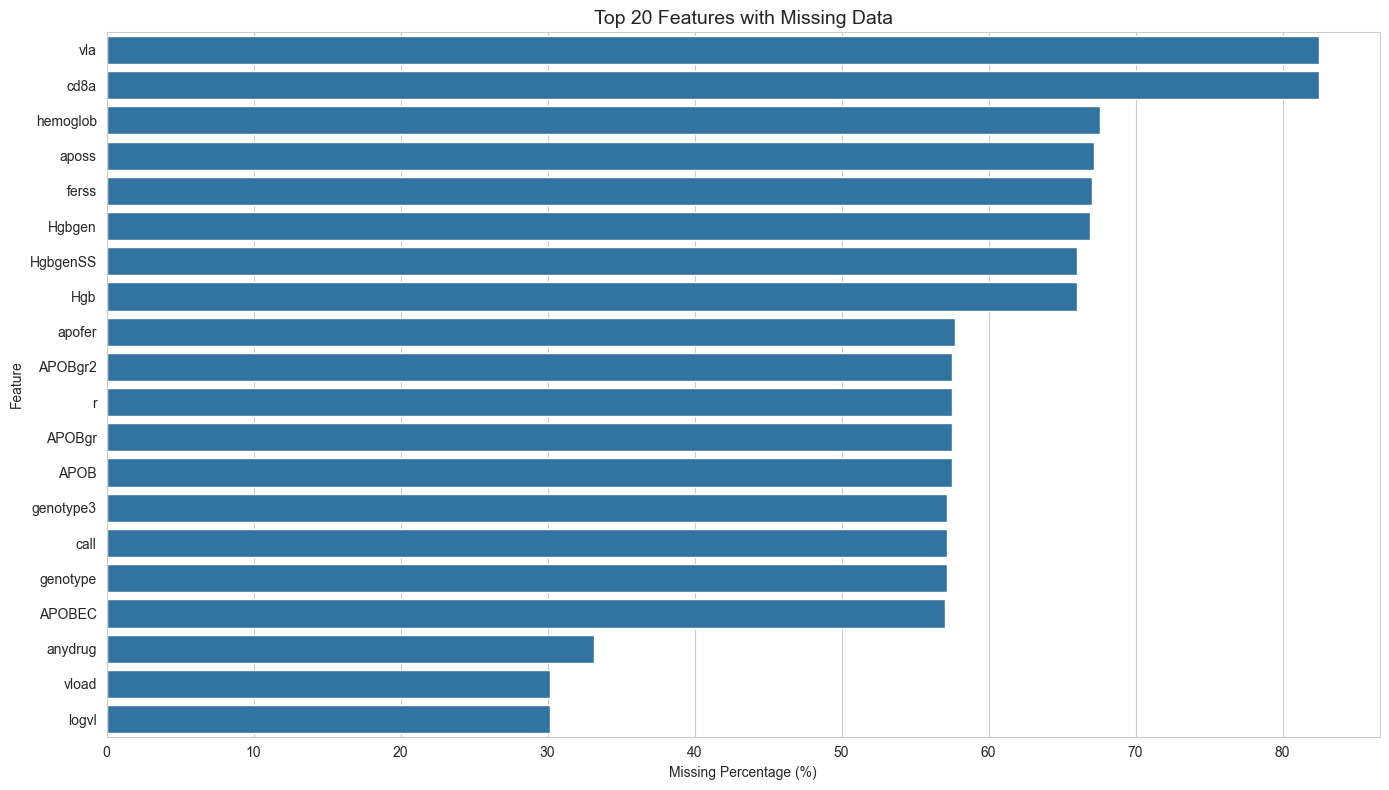

In [8]:
# Visualize missing data patterns
fig, ax = plt.subplots(figsize=(14, 8))
missing_cols = missing_data[missing_data['missing_pct'] > 0].head(20)

sns.barplot(data=missing_cols, y='column', x='missing_pct', ax=ax)
ax.set_title('Top 20 Features with Missing Data', fontsize=14)
ax.set_xlabel('Missing Percentage (%)')
ax.set_ylabel('Feature')
plt.tight_layout()
plt.show()

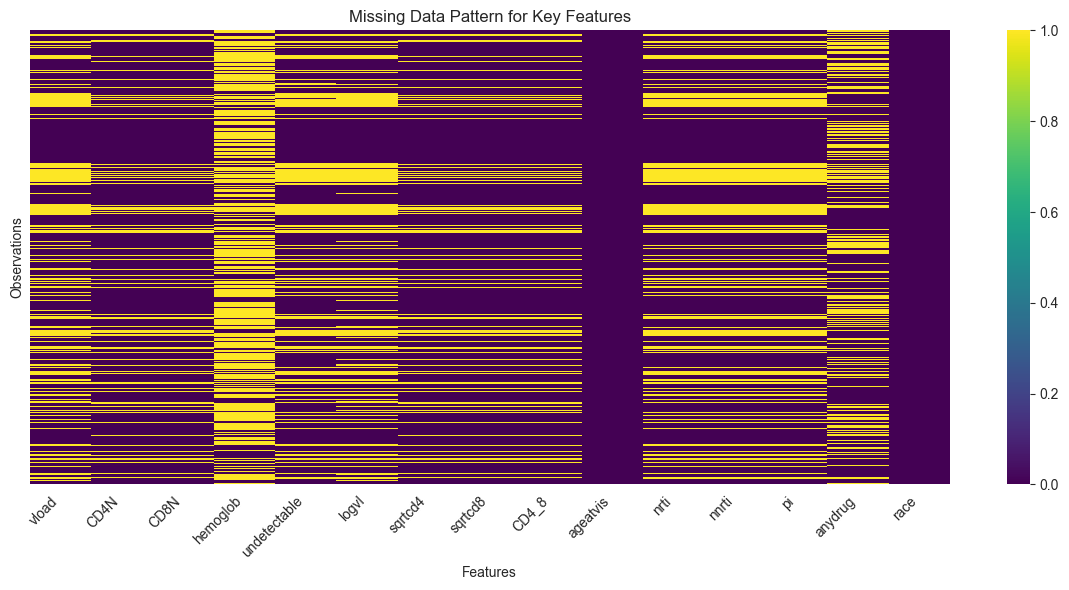

In [9]:
# Missing data heatmap for key features
key_features = ['vload', 'CD4N', 'CD8N', 'hemoglob', 'undetectable', 
                'logvl', 'sqrtcd4', 'sqrtcd8', 'CD4_8', 'ageatvis',
                'nrti', 'nnrti', 'pi', 'anydrug', 'race']

plt.figure(figsize=(12, 6))
sns.heatmap(df[key_features].isnull(), cbar=True, yticklabels=False, cmap='viridis')
plt.title('Missing Data Pattern for Key Features')
plt.xlabel('Features')
plt.ylabel('Observations')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## 5. Feature Groups Analysis

In [10]:
# Define feature groups based on codebook
feature_groups = {
    'identifiers': ['wihsid', 'bsdate', 'bsvisit', 'dob', 'visit', 'date', 'n', 'N'],
    'demographics': ['race', 'ageatvis', 'status'],
    'clinical_dates': ['lnegdate', 'fposdate', 'frstartd', 'frstaidd', 'frstdthd', 'duration', 'durationy'],
     'viral_immune': ['CD4N', 'CD8N', 'sqrtcd4', 'sqrtcd8', 'CD4_8', 'cd8a'],
    'treatments': ['nrti', 'nnrti', 'pi', 'anydrug'],
    'hemoglobin': ['hemoglob', 'Hgb', 'Hgbgen', 'HgbgenSS'],
    'genotype': ['call', 'genotype', 'genotype3', 'APOBEC', 'APOB', 'APOBgr', 'APOBgr2', 
                 'apofer', 'ferss', 'aposs'],
    'target': ['undetectable', 'HIV', 'r']
}

print("Feature Groups Summary:")
for group, features in feature_groups.items():
    available_features = [f for f in features if f in df.columns]
    print(f"\n{group.upper()} ({len(available_features)} features):")
    print(available_features)

Feature Groups Summary:

IDENTIFIERS (8 features):
['wihsid', 'bsdate', 'bsvisit', 'dob', 'visit', 'date', 'n', 'N']

DEMOGRAPHICS (3 features):
['race', 'ageatvis', 'status']

CLINICAL_DATES (7 features):
['lnegdate', 'fposdate', 'frstartd', 'frstaidd', 'frstdthd', 'duration', 'durationy']

VIRAL_IMMUNE (6 features):
['CD4N', 'CD8N', 'sqrtcd4', 'sqrtcd8', 'CD4_8', 'cd8a']

TREATMENTS (4 features):
['nrti', 'nnrti', 'pi', 'anydrug']

HEMOGLOBIN (4 features):
['hemoglob', 'Hgb', 'Hgbgen', 'HgbgenSS']

GENOTYPE (10 features):
['call', 'genotype', 'genotype3', 'APOBEC', 'APOB', 'APOBgr', 'APOBgr2', 'apofer', 'ferss', 'aposs']

TARGET (3 features):
['undetectable', 'HIV', 'r']


## 6. Key Feature Distributions

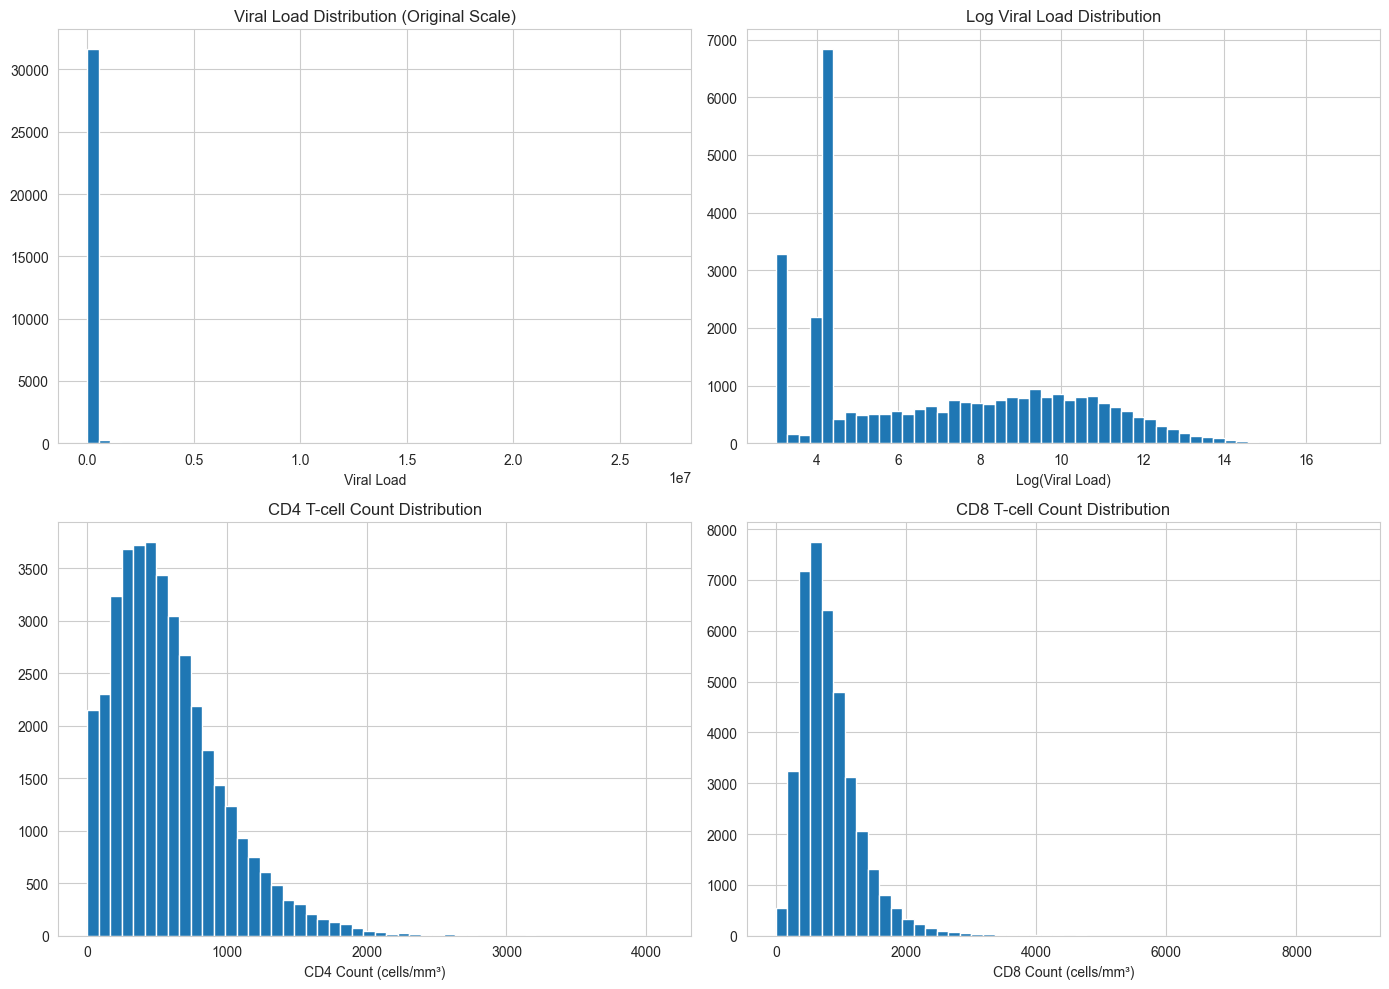

In [11]:
# Viral load distribution
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Original viral load
df['vload'].dropna().hist(bins=50, ax=axes[0, 0])
axes[0, 0].set_title('Viral Load Distribution (Original Scale)')
axes[0, 0].set_xlabel('Viral Load')

# Log viral load
df['logvl'].dropna().hist(bins=50, ax=axes[0, 1])
axes[0, 1].set_title('Log Viral Load Distribution')
axes[0, 1].set_xlabel('Log(Viral Load)')

# CD4 count
df['CD4N'].dropna().hist(bins=50, ax=axes[1, 0])
axes[1, 0].set_title('CD4 T-cell Count Distribution')
axes[1, 0].set_xlabel('CD4 Count (cells/mm³)')

# CD8 count
df['CD8N'].dropna().hist(bins=50, ax=axes[1, 1])
axes[1, 1].set_title('CD8 T-cell Count Distribution')
axes[1, 1].set_xlabel('CD8 Count (cells/mm³)')

plt.tight_layout()
plt.show()

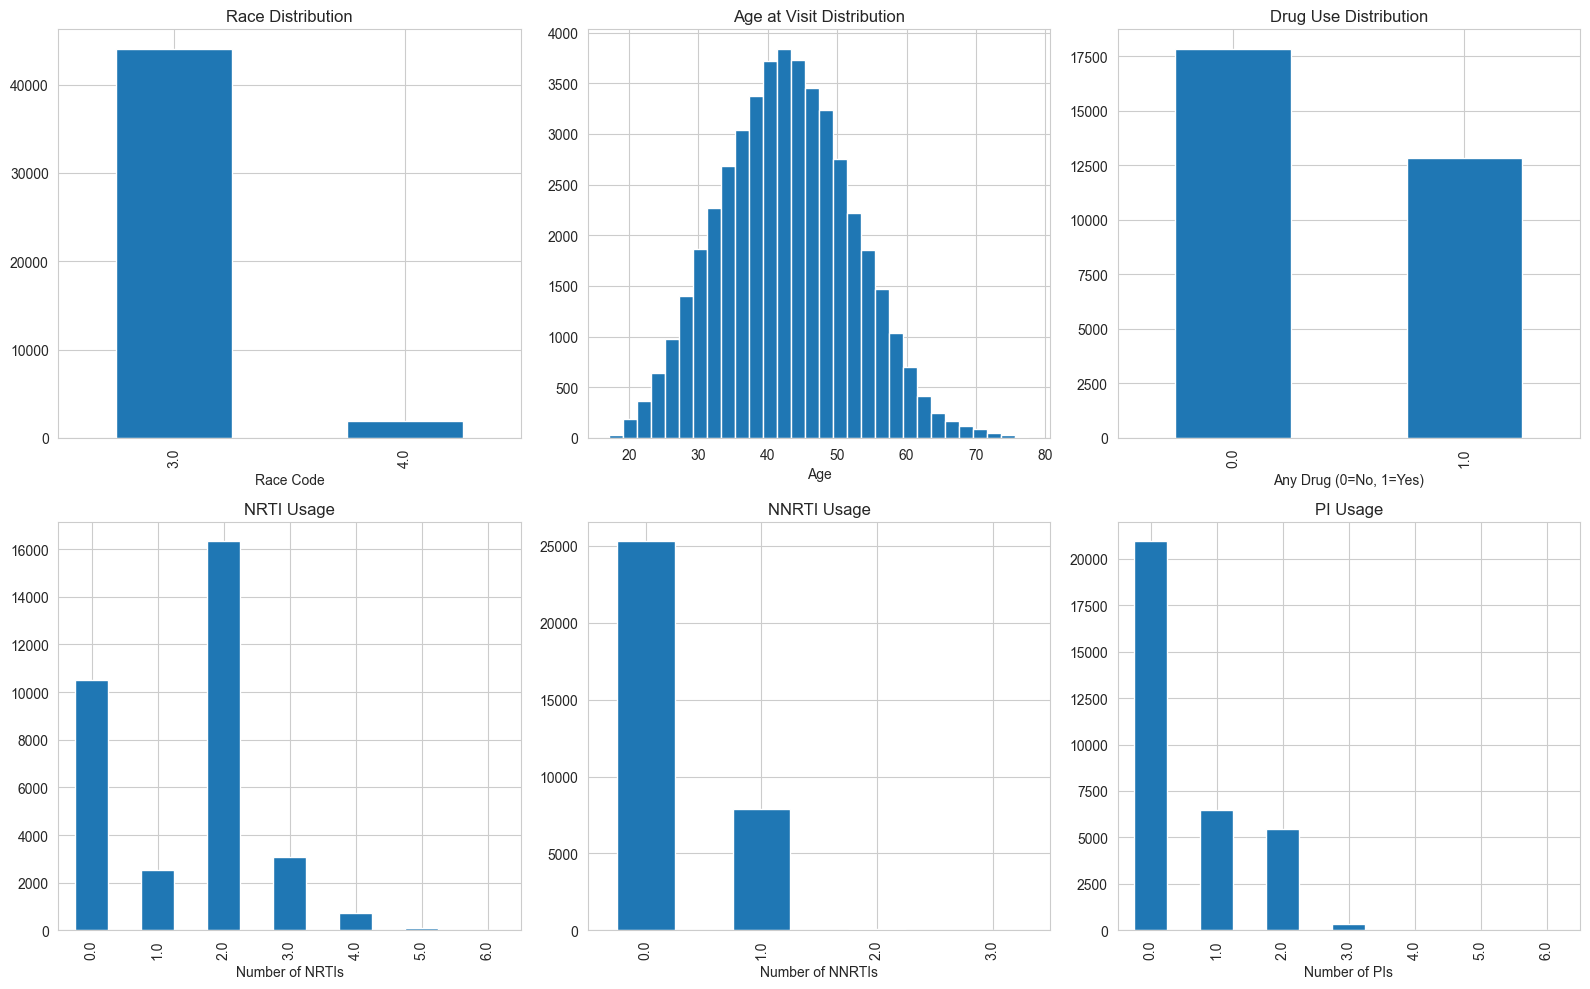

In [12]:
# Treatment and demographic distributions
fig, axes = plt.subplots(2, 3, figsize=(16, 10))

# Race distribution
df['race'].value_counts().sort_index().plot(kind='bar', ax=axes[0, 0])
axes[0, 0].set_title('Race Distribution')
axes[0, 0].set_xlabel('Race Code')

# Age distribution
df['ageatvis'].dropna().hist(bins=30, ax=axes[0, 1])
axes[0, 1].set_title('Age at Visit Distribution')
axes[0, 1].set_xlabel('Age')

# Drug use
df['anydrug'].value_counts().plot(kind='bar', ax=axes[0, 2])
axes[0, 2].set_title('Drug Use Distribution')
axes[0, 2].set_xlabel('Any Drug (0=No, 1=Yes)')

# NRTI usage
df['nrti'].value_counts().sort_index().plot(kind='bar', ax=axes[1, 0])
axes[1, 0].set_title('NRTI Usage')
axes[1, 0].set_xlabel('Number of NRTIs')

# NNRTI usage
df['nnrti'].value_counts().sort_index().plot(kind='bar', ax=axes[1, 1])
axes[1, 1].set_title('NNRTI Usage')
axes[1, 1].set_xlabel('Number of NNRTIs')

# PI usage
df['pi'].value_counts().sort_index().plot(kind='bar', ax=axes[1, 2])
axes[1, 2].set_title('PI Usage')
axes[1, 2].set_xlabel('Number of PIs')

plt.tight_layout()
plt.show()

## 7. Bivariate Analysis: Features vs Target

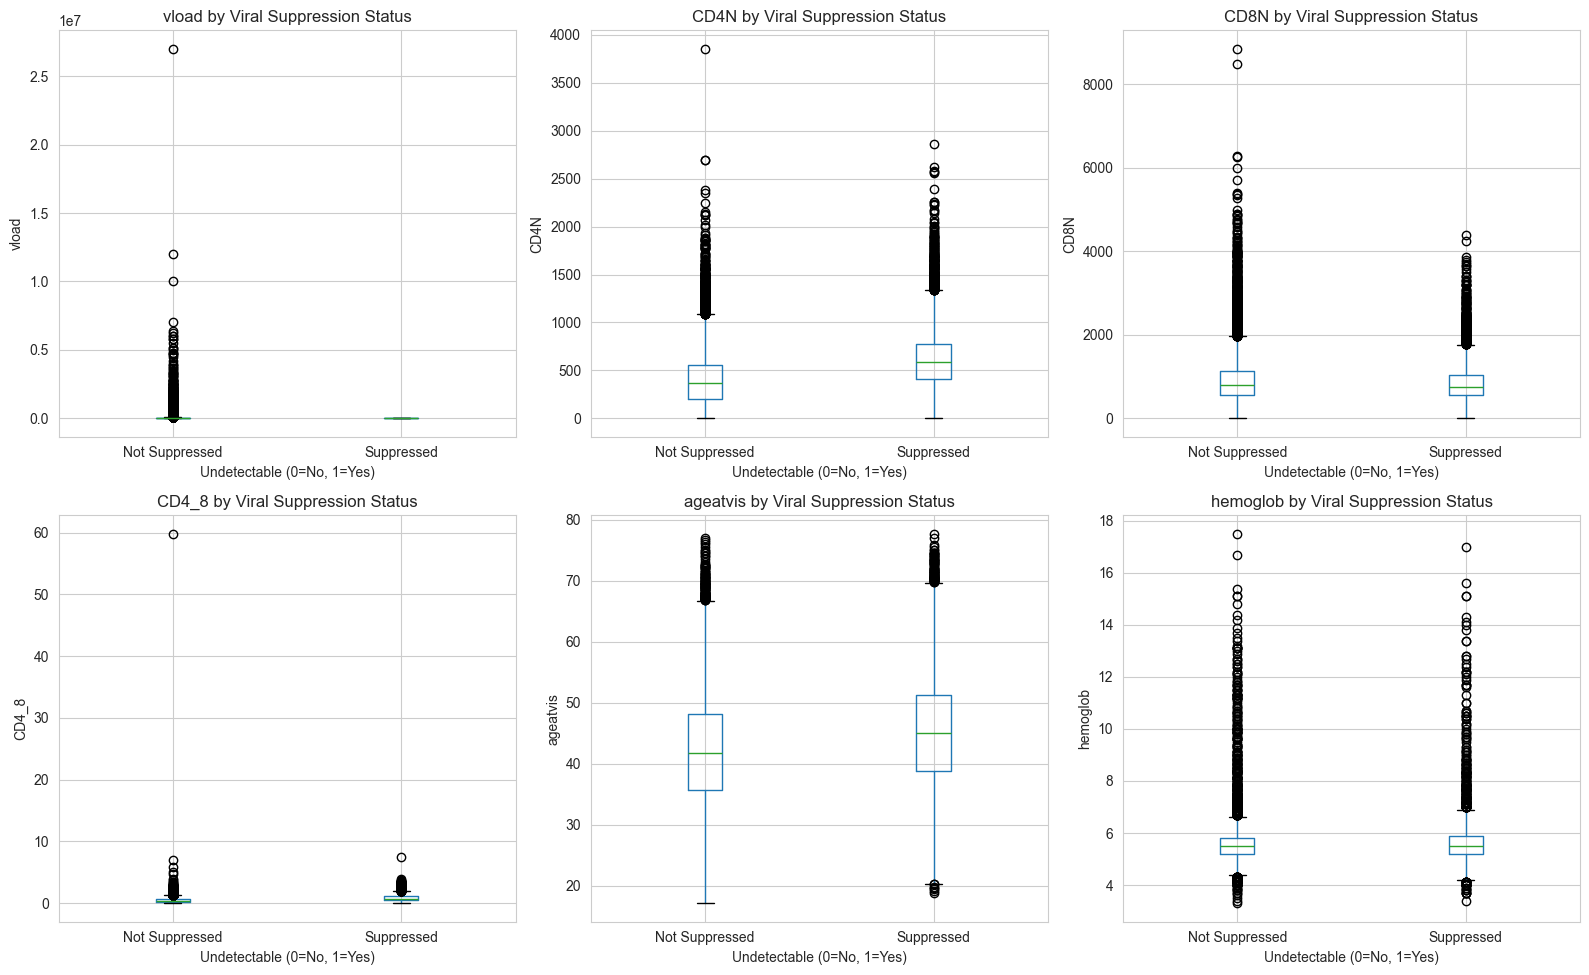

In [13]:
# Compare key features by viral suppression status
numeric_features = ['vload', 'CD4N', 'CD8N', 'CD4_8', 'ageatvis', 'hemoglob']

fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.ravel()

for idx, feature in enumerate(numeric_features):
    if feature in df.columns:
        df_temp = df[[feature, 'undetectable']].dropna()
        if len(df_temp) > 0:
            df_temp.boxplot(column=feature, by='undetectable', ax=axes[idx])
            axes[idx].set_title(f'{feature} by Viral Suppression Status')
            axes[idx].set_xlabel('Undetectable (0=No, 1=Yes)')
            axes[idx].set_ylabel(feature)
            plt.sca(axes[idx])
            plt.xticks([1, 2], ['Not Suppressed', 'Suppressed'])

plt.suptitle('')
plt.tight_layout()
plt.show()

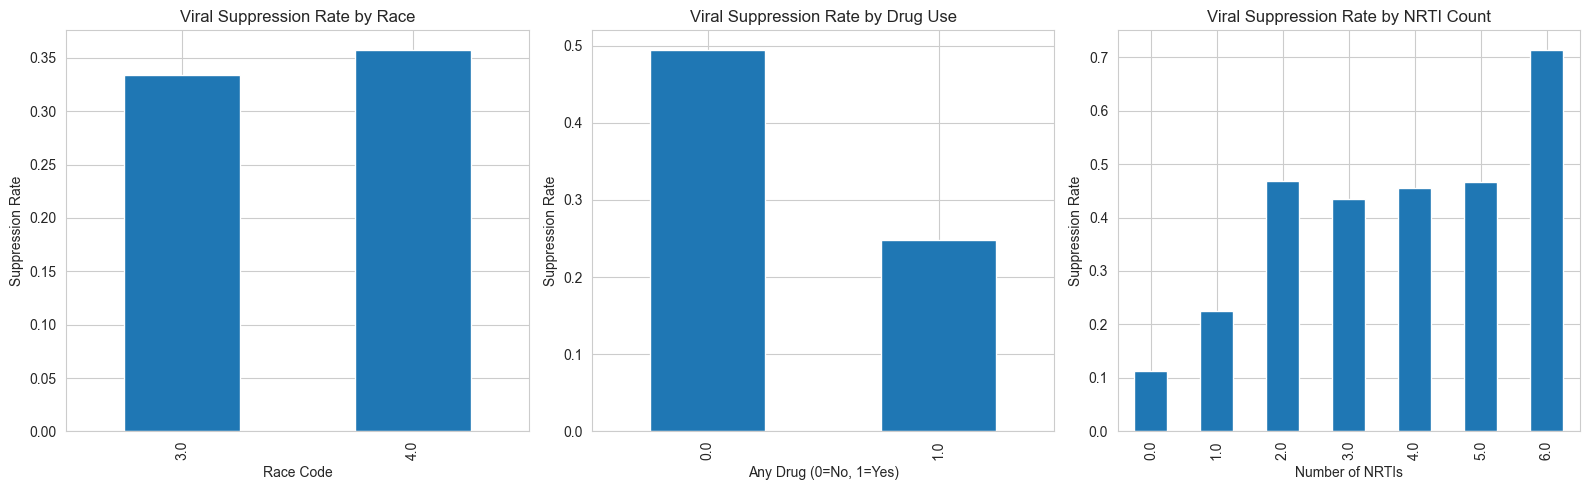

In [14]:
# Viral suppression rate by categorical features
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# By race
suppression_by_race = df.groupby('race')['undetectable'].mean()
suppression_by_race.plot(kind='bar', ax=axes[0])
axes[0].set_title('Viral Suppression Rate by Race')
axes[0].set_ylabel('Suppression Rate')
axes[0].set_xlabel('Race Code')

# By drug use
suppression_by_drug = df.groupby('anydrug')['undetectable'].mean()
suppression_by_drug.plot(kind='bar', ax=axes[1])
axes[1].set_title('Viral Suppression Rate by Drug Use')
axes[1].set_ylabel('Suppression Rate')
axes[1].set_xlabel('Any Drug (0=No, 1=Yes)')

# By treatment (NRTI)
suppression_by_nrti = df.groupby('nrti')['undetectable'].mean()
suppression_by_nrti.plot(kind='bar', ax=axes[2])
axes[2].set_title('Viral Suppression Rate by NRTI Count')
axes[2].set_ylabel('Suppression Rate')
axes[2].set_xlabel('Number of NRTIs')

plt.tight_layout()
plt.show()

## 8. Correlation Analysis

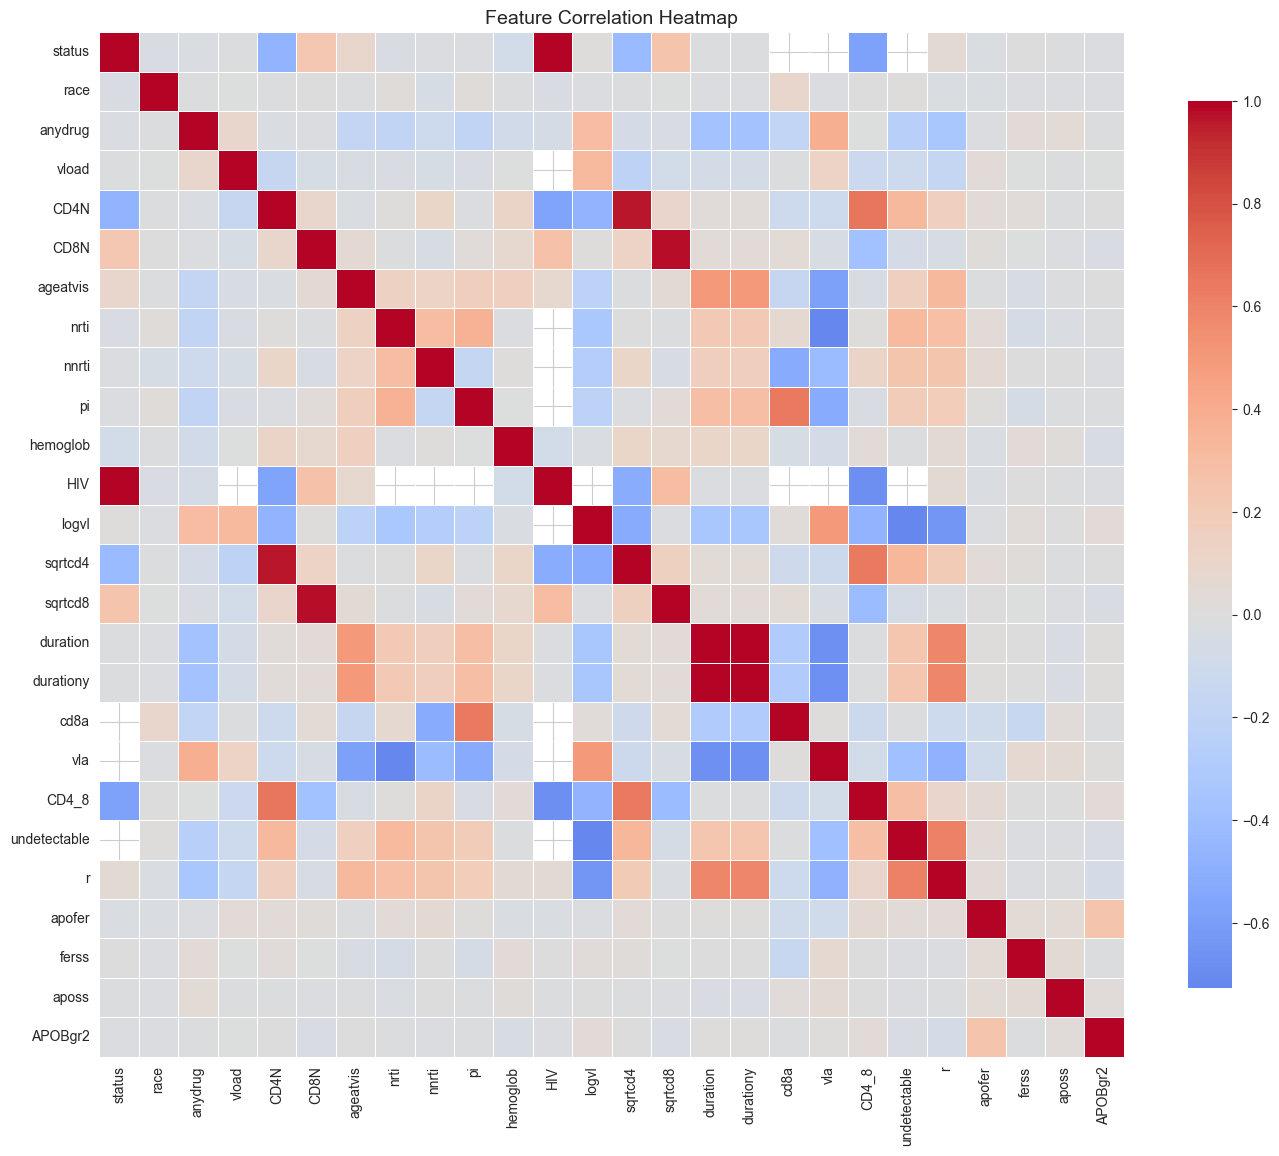

In [15]:
# Select numeric columns for correlation
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
# Remove identifiers and dates
exclude_cols = ['wihsid', 'bsdate', 'bsvisit', 'dob', 'visit', 'date', 'n', 'N',
                'lnegdate', 'fposdate', 'frstartd', 'frstaidd', 'frstdthd']
numeric_cols = [col for col in numeric_cols if col not in exclude_cols]

# Compute correlation matrix
corr_matrix = df[numeric_cols].corr()

# Plot correlation heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Heatmap', fontsize=14)
plt.tight_layout()
plt.show()

Correlation with Viral Suppression Status (undetectable):
undetectable    1.000000
r               0.613032
sqrtcd4         0.336889
CD4N            0.322984
nrti            0.313266
CD4_8           0.293804
nnrti           0.247705
duration        0.242178
durationy       0.242178
pi              0.193194
ageatvis        0.160292
apofer          0.034352
race            0.009442
cd8a           -0.009787
hemoglob       -0.013784
ferss          -0.020311
aposs          -0.023867
APOBgr2        -0.032138
sqrtcd8        -0.053603
CD8N           -0.063595
vload          -0.113869
anydrug        -0.247827
vla            -0.387574
logvl          -0.713630
status               NaN
HIV                  NaN
dtype: float64


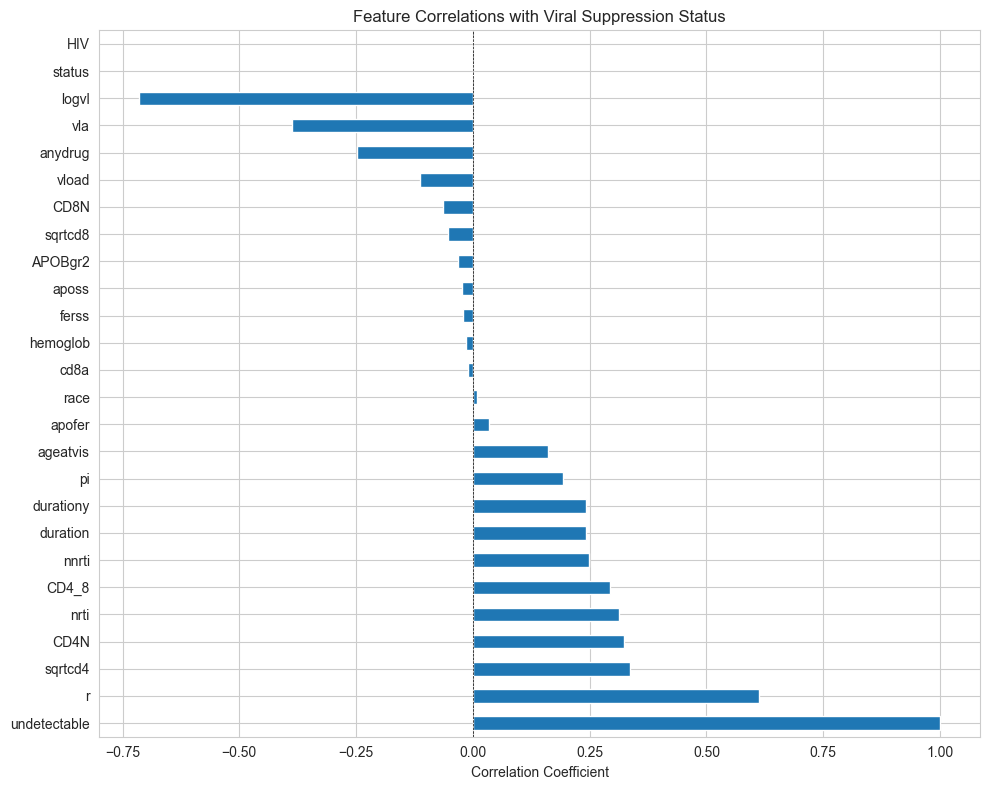

In [16]:
# Correlation with target variable
target_corr = df[numeric_cols].corrwith(df['undetectable']).sort_values(ascending=False)
print("Correlation with Viral Suppression Status (undetectable):")
print(target_corr)

# Visualize top correlations
fig, ax = plt.subplots(figsize=(10, 8))
target_corr.plot(kind='barh', ax=ax)
ax.set_title('Feature Correlations with Viral Suppression Status')
ax.set_xlabel('Correlation Coefficient')
ax.axvline(x=0, color='black', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

## 9. Temporal Analysis

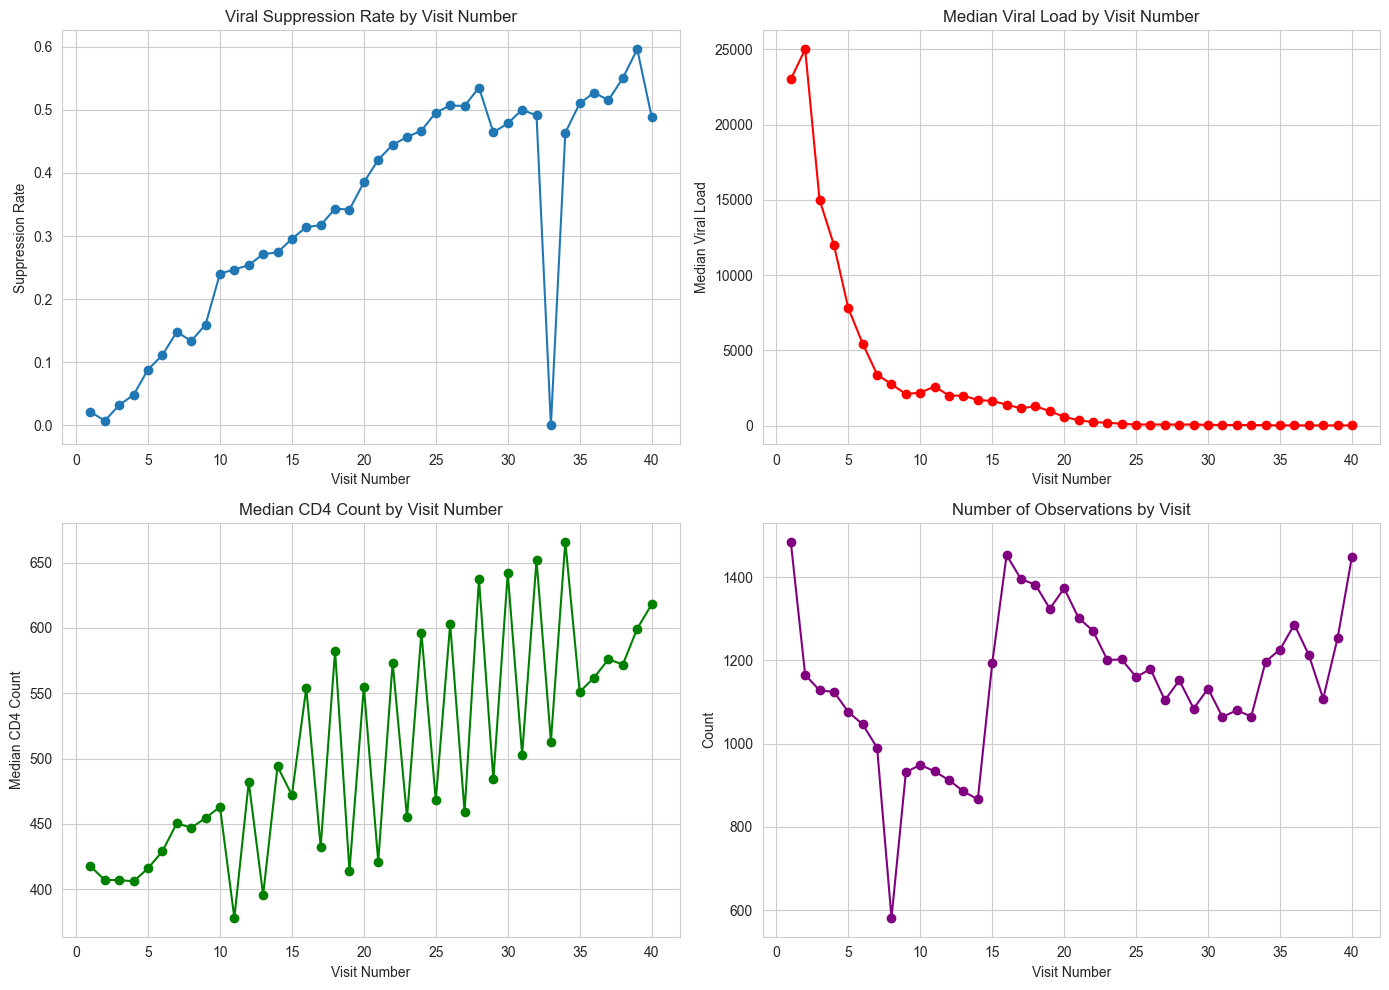

In [17]:
# Visit progression analysis
visit_stats = df.groupby('visit').agg({
    'undetectable': 'mean',
    'vload': 'median',
    'CD4N': 'median',
    'wihsid': 'count'
}).rename(columns={'wihsid': 'count'})

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Suppression rate over visits
visit_stats['undetectable'].plot(ax=axes[0, 0], marker='o')
axes[0, 0].set_title('Viral Suppression Rate by Visit Number')
axes[0, 0].set_xlabel('Visit Number')
axes[0, 0].set_ylabel('Suppression Rate')

# Median viral load over visits
visit_stats['vload'].plot(ax=axes[0, 1], marker='o', color='red')
axes[0, 1].set_title('Median Viral Load by Visit Number')
axes[0, 1].set_xlabel('Visit Number')
axes[0, 1].set_ylabel('Median Viral Load')

# Median CD4 over visits
visit_stats['CD4N'].plot(ax=axes[1, 0], marker='o', color='green')
axes[1, 0].set_title('Median CD4 Count by Visit Number')
axes[1, 0].set_xlabel('Visit Number')
axes[1, 0].set_ylabel('Median CD4 Count')

# Patient count by visit
visit_stats['count'].plot(ax=axes[1, 1], marker='o', color='purple')
axes[1, 1].set_title('Number of Observations by Visit')
axes[1, 1].set_xlabel('Visit Number')
axes[1, 1].set_ylabel('Count')

plt.tight_layout()
plt.show()

## 10. Genotype Analysis

In [18]:
# Genotype features analysis
genotype_features = ['call', 'genotype', 'genotype3', 'Hgbgen', 'HgbgenSS', 'APOB', 'APOBgr']
available_genotype = [f for f in genotype_features if f in df.columns]

print("Genotype Features Summary:")
for feature in available_genotype:
    print(f"\n{feature}:")
    print(df[feature].value_counts().head(10))
    if df[feature].notna().sum() > 0:
        suppression_rate = df.groupby(feature)['undetectable'].mean()
        print(f"\nSuppression rate by {feature}:")
        print(suppression_rate)

Genotype Features Summary:

call:
call
C/C    17758
A/C     1818
A/A       90
Name: count, dtype: int64

Suppression rate by call:
call
A/A    0.500000
A/C    0.382567
C/C    0.372445
Name: undetectable, dtype: float64

genotype:
genotype
C/C           17758
A/A or A/C     1908
Name: count, dtype: int64

Suppression rate by genotype:
genotype
A/A or A/C    0.390189
C/C           0.372445
Name: undetectable, dtype: float64

genotype3:
genotype3
C/C    17758
A/C     1818
A/A       90
Name: count, dtype: int64

Suppression rate by genotype3:
genotype3
A/A    0.500000
A/C    0.382567
C/C    0.372445
Name: undetectable, dtype: float64

Hgbgen:
Hgbgen
AA    13669
AS     1520
Name: count, dtype: int64

Suppression rate by Hgbgen:
Hgbgen
AA    0.387082
AS    0.412414
Name: undetectable, dtype: float64

HgbgenSS:
HgbgenSS
AA    13669
AS     1520
SS      407
Name: count, dtype: int64

Suppression rate by HgbgenSS:
HgbgenSS
AA    0.387082
AS    0.412414
SS    0.317391
Name: undetectable, dtype: f

## 11. Key Insights Summary

In [19]:
# Generate summary statistics
print("="*60)
print("KEY EDA INSIGHTS")
print("="*60)

print(f"\n1. Dataset Overview:")
print(f"   - Total observations: {len(df):,}")
print(f"   - Unique patients: {df['wihsid'].nunique():,}")
print(f"   - Average visits per patient: {len(df)/df['wihsid'].nunique():.2f}")
print(f"   - Total features: {df.shape[1]}")

print(f"\n2. Target Variable (Viral Suppression):")
print(f"   - Suppressed cases: {df['undetectable'].sum():,} ({df['undetectable'].mean()*100:.2f}%)")
print(f"   - Not suppressed: {(df['undetectable']==0).sum():,} ({(1-df['undetectable'].mean())*100:.2f}%)")
print(f"   - Missing: {df['undetectable'].isna().sum():,}")

print(f"\n3. Missing Data:")
high_missing = missing_data[missing_data['missing_pct'] > 50]
print(f"   - Features with >50% missing: {len(high_missing)}")
print(f"   - Features with >0% missing: {(missing_data['missing_pct'] > 0).sum()}")

print(f"\n4. Key Clinical Features:")
print(f"   - Viral load available: {df['vload'].notna().sum():,} ({df['vload'].notna().mean()*100:.2f}%)")
print(f"   - CD4 count available: {df['CD4N'].notna().sum():,} ({df['CD4N'].notna().mean()*100:.2f}%)")
print(f"   - CD8 count available: {df['CD8N'].notna().sum():,} ({df['CD8N'].notna().mean()*100:.2f}%)")
print(f"   - Hemoglobin available: {df['hemoglob'].notna().sum():,} ({df['hemoglob'].notna().mean()*100:.2f}%)")

print(f"\n5. Treatment Data:")
print(f"   - NRTI usage available: {df['nrti'].notna().sum():,} ({df['nrti'].notna().mean()*100:.2f}%)")
print(f"   - NNRTI usage available: {df['nnrti'].notna().sum():,} ({df['nnrti'].notna().mean()*100:.2f}%)")
print(f"   - PI usage available: {df['pi'].notna().sum():,} ({df['pi'].notna().mean()*100:.2f}%)")

print(f"\n6. Demographics:")
print(f"   - Age range: {df['ageatvis'].min():.1f} - {df['ageatvis'].max():.1f} years")
print(f"   - Mean age: {df['ageatvis'].mean():.1f} years")
print(f"   - Race categories: {df['race'].nunique()}")

print("\n" + "="*60)

KEY EDA INSIGHTS

1. Dataset Overview:
   - Total observations: 45,920
   - Unique patients: 2,852
   - Average visits per patient: 16.10
   - Total features: 48

2. Target Variable (Viral Suppression):
   - Suppressed cases: 11,064.0 (33.52%)
   - Not suppressed: 21,947 (66.48%)
   - Missing: 12,909

3. Missing Data:
   - Features with >50% missing: 17
   - Features with >0% missing: 47

4. Key Clinical Features:
   - Viral load available: 32,077 (69.85%)
   - CD4 count available: 38,903 (84.72%)
   - CD8 count available: 38,892 (84.70%)
   - Hemoglobin available: 14,893 (32.43%)

5. Treatment Data:
   - NRTI usage available: 33,252 (72.41%)
   - NNRTI usage available: 33,252 (72.41%)
   - PI usage available: 33,252 (72.41%)

6. Demographics:
   - Age range: 17.1 - 77.7 years
   - Mean age: 42.8 years
   - Race categories: 2



## Next Steps

Based on this EDA, the following preprocessing strategies will be explored:

1. **Strategy 1 - Simple Imputation**: Mean/median for numeric, mode for categorical
2. **Strategy 2 - Advanced Imputation**: KNN and MICE (Multiple Imputation by Chained Equations)
3. **Strategy 3 - Domain-Informed**: Clinical knowledge-based imputation with feature engineering

Key considerations:
- High missingness in genotype features
- Class imbalance in target variable
- Longitudinal nature of data (multiple visits per patient)
- Strong correlations between transformed features (e.g., vload vs logvl)